In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("data/combined_data.csv", low_memory=False)

featureLabels = {
    # House types
    "dwelltype_Separate House": "Living in House",
    "dwelltype_Terrace or Townhouse": "Living in Townhouse/Terrace",
    "dwelltype_Unit, Flat or Apartment": "Living in Unit/Flat/Apartment",
    "dwelltype_Other": "Living in Other",

    # Regions
    "homesubregion_ASGS_MELB - Inner": "Living in Inner Melb",
    "homesubregion_ASGS_MELB - Middle": "Living in Middle Melb",
    "homesubregion_ASGS_MELB - Outer": "Living in Outer Melb",
    "homesubregion_ASGS_Other": "Living in Other Regions",

    # Occupations
    "occupation_Office": "Occupation - Office",
    "occupation_On-Site/Manual": "Occupation - Onsite/Manual",
    "occupation_Service": "Occupation - Service",

    # Industries
    "industry_Information-Based": "Industry - Information-Based",
    "industry_Physical": "Industry - Physical",
    "industry_Public-Facing": "Industry - Public-Facing",
    "industry_Other": "Industry - Other",

    # Age groups
    "agegroup_<20": "Age - <20 yrs",
    "agegroup_20->29": "Age - 20->29 yrs",
    "agegroup_30->39": "Age - 30->39 yrs",
    "agegroup_40->49": "Age - 40->49 yrs",
    "agegroup_50+": "Age - 50+ yrs",

    # Sex
    "sex_Female": "Sex - Female",
    "sex_Male": "Sex - Male",

    # Car license
    "carlicence_Has licence": "Car License - Has",
    "carlicence_No licence": "Car License - None",

    # Employment type
    "employment_type_Casual": "Employment - Casual",
    "employment_type_Full-time": "Employment - Full-time",
    "employment_type_Other": "Employment - Other",
    "employment_type_Part-time": "Employment - Part-time",

    # Homeownership status
    "owndwell_Being Purchased": "Dwelling - Being Purchased",
    "owndwell_Being Rented": "Dwelling - Being Rented",
    "owndwell_Fully Owned": "Dwelling - Fully Owned",
    "owndwell_Occupied Rent-Free": "Dwelling - Rent-Free",

    # Continuous variables
    "hhinc_group_median": "Household Income",
    "persinc_group_median": "Personal Income",
    "hhsize": "Household Size",
    "totalvehs": "Total Vehicles",
}
features = list(featureLabels.keys())
correlations = df[features].corrwith(df["wfh_days"])
correlations = correlations.rename(index=featureLabels)

print(correlations)

Living in House                 -0.026323
Living in Townhouse/Terrace      0.064908
Living in Unit/Flat/Apartment   -0.023960
Living in Other                 -0.018964
Living in Inner Melb             0.085283
Living in Middle Melb            0.063345
Living in Outer Melb            -0.060779
Living in Other Regions         -0.117144
Occupation - Office              0.306568
Occupation - Onsite/Manual      -0.231127
Occupation - Service            -0.147828
Industry - Information-Based     0.187980
Industry - Physical             -0.093615
Industry - Public-Facing        -0.185781
Industry - Other                 0.137898
Age - <20 yrs                   -0.103537
Age - 20->29 yrs                -0.106884
Age - 30->39 yrs                 0.026796
Age - 40->49 yrs                 0.116290
Age - 50+ yrs                   -0.004340
Sex - Female                    -0.011069
Sex - Male                       0.011069
Car License - Has                0.040886
Car License - None              -0

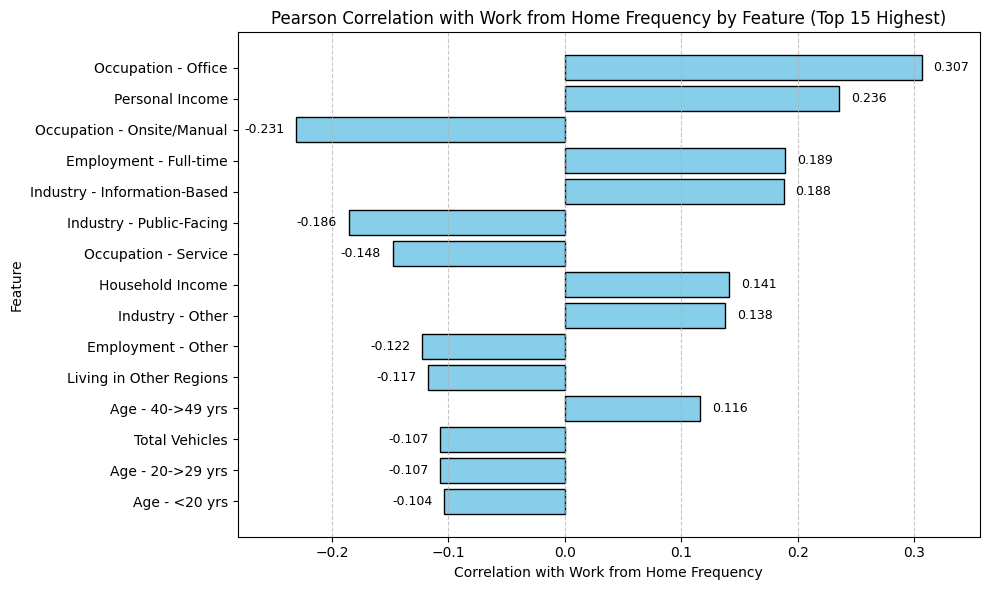

In [7]:
correlations = correlations.reindex(correlations.abs().sort_values(ascending=False).index)
highestCorrelation = correlations.head(15)

# Plot top correlations as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(highestCorrelation.index, highestCorrelation.values, color="skyblue", edgecolor="black")

# Invert y-axis so the highest correlation is on top
plt.gca().invert_yaxis()

# Labels and title
plt.xlabel("Correlation with Work from Home Frequency")
plt.ylabel("Feature")
plt.title("Pearson Correlation with Work from Home Frequency by Feature (Top 15 Highest)")

# Add value labels next to bars
for i, (val, name) in enumerate(zip(highestCorrelation.values, highestCorrelation.index)):
    plt.text(val + (0.01 if val > 0 else -0.01), i, f"{val:.3f}", va="center",
             ha="left" if val > 0 else "right", fontsize=9)

# Add a subtle horizontal grid for readability
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.xlim(min(highestCorrelation.values) - 0.05, max(highestCorrelation.values) + 0.05)
plt.tight_layout()
plt.savefig("images/top_correlations.png", dpi=300)
plt.show()
plt.close()


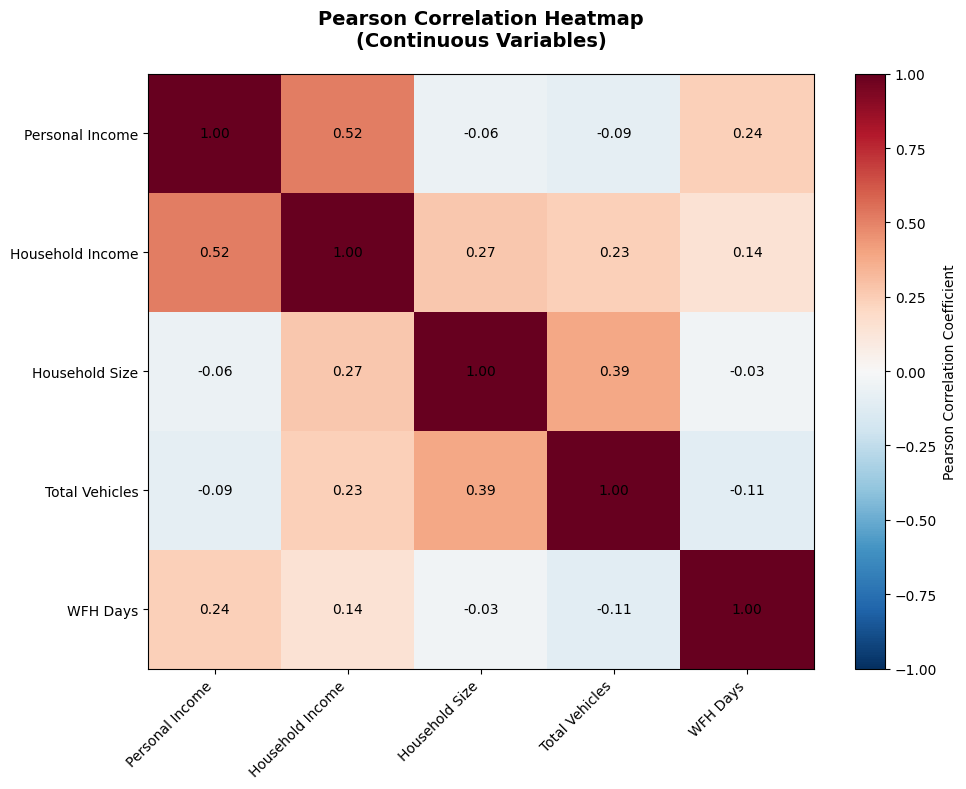

In [8]:
# Define continuous variables
heatmapFeatures = {
    "persinc_group_median": "Personal Income",
    "hhinc_group_median": "Household Income",
    "hhsize": "Household Size",
    "totalvehs": "Total Vehicles",
    "wfh_days": "WFH Days"
}

heatmapDF = df[list(heatmapFeatures.keys())].dropna()
heatmapCorrelations = heatmapDF.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
plt.imshow(heatmapCorrelations, cmap="RdBu_r", aspect="auto", vmin=-1, vmax=1)
plt.colorbar(label="Pearson Correlation Coefficient")

# Add labels
labels = list(heatmapFeatures.values())
plt.xticks(range(len(labels)), labels, rotation=45, ha="right")
plt.yticks(range(len(labels)), labels)

# Add correlation values in cells
for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, f"{heatmapCorrelations.iloc[i, j]:.2f}",
                ha="center", va="center", color="black", fontsize=10)

plt.title("Pearson Correlation Heatmap\n(Continuous Variables)", 
          fontsize=14, fontweight="bold", pad=20)
plt.tight_layout()
plt.savefig("images/correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()